In [1]:
pip install torchvision torchmetrics hub torchsummary torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Obtaining dependency information for humbug>=0.3.1 from https://files.pythonhosted.org/packages/c8/cc/c8129d6e9a1f473b5e90cf1b8eac43191a22657b9b673e02815548662270/humbug-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for libdeeplake==0.0.95 from https://files.pythonhosted.org/packages/68/47/af028040402ccdfc498da2521789d3dfe514af50354a13cb3a4f90a3650b/libdeeplake-0.0.95-cp310-cp310-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for aioboto3>=10.4.0 from https://files.pythonhosted.org/packages/75/50/e56cabec21ee746e7245d0a3d87f4e8c788b5249486ad1351dbfc01249ff/aioboto3-12.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for boto3 from https://files.pythonhosted.org/packages/81/bf/1dccda444c

In [2]:
pip install torchmetrics torchmetrics[detection] faster-coco-eval pycocotools

  Obtaining dependency information for faster-coco-eval from https://files.pythonhosted.org/packages/83/27/9b282a7abe5e9c2d886d92d603daefe5dd26a2e3d7be6a53e9d961d0ce73/faster_coco_eval-1.4.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.9/560.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 34.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wandb --user

Note: you may need to restart the kernel to use updated packages.


**Note: You should restart kernel after install these libraries**

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random

from torchsummary import summary
import os
import os.path as osp

import random
import xml.etree.ElementTree as ET
import cv2
import torch
import torch.nn as nn
from torch.autograd import Function
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import itertools
from math import sqrt
import time

torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

import warnings
warnings.filterwarnings("ignore")

In [5]:
import torch
print(torch.cuda.is_available())

True


In [6]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

### **To get data**

In [7]:
# pip install --upgrade hub

In [8]:
import hub
ds_train = hub.load("hub://activeloop/wider-face-train")
ds_val = hub.load("hub://activeloop/wider-face-val")

-

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wider-face-train



|

hub://activeloop/wider-face-train loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wider-face-val



\

hub://activeloop/wider-face-val loaded successfully.



### **Visualize**

1 [[361.  98. 624. 437.]]
[[ 78. 221.  85. 229.]
 [ 78. 238.  92. 255.]
 [113. 212. 124. 227.]
 [134. 260. 149. 275.]
 [163. 250. 177. 267.]
 [201. 218. 211. 230.]
 [182. 266. 197. 283.]
 [245. 279. 263. 294.]
 [304. 265. 320. 282.]
 [328. 295. 344. 315.]
 [389. 281. 406. 300.]
 [406. 293. 427. 314.]
 [436. 290. 458. 307.]
 [522. 328. 543. 346.]
 [643. 320. 666. 342.]
 [653. 224. 670. 249.]
 [793. 337. 816. 367.]
 [535. 311. 551. 328.]
 [ 29. 220.  40. 235.]
 [  3. 232.  14. 247.]
 [ 20. 215.  32. 231.]]


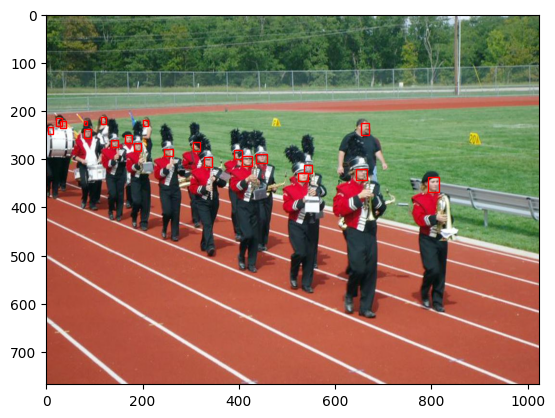

In [9]:
def convert_to_XYXY(anno_list, idx):
    ret = []

    boxes = np.array(anno_list[idx])

    for i in range(len(boxes)):
        bbox = np.array(boxes)[i]
#         print(bbox)
        xmin = bbox[0]
        ymin = bbox[1]
        widthb = bbox[2]  # Width and height of bbox
        heightb = bbox[3]
        xmax = xmin + widthb
        ymax = ymin + heightb

        ret.append([xmin, ymin, xmax, ymax])

    return np.array(ret)


# for idx in range(20):
idx = 1
print(idx, convert_to_XYXY(ds_train['boxes'], 1))



import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

idx = 2
# Load the image using OpenCV
# image_path = img_file_path[idx]
image = np.array(ds_train['images'][idx])

# Create a figure and axis
fig, ax = plt.subplots()
# Define the rectangle coordinates
bboxes = convert_to_XYXY(ds_train['boxes'], idx)
print(bboxes)
for bbox in bboxes:
    x1, y1 = bbox[0], bbox[1]
    x2, y2 = bbox[2], bbox[3]

    # Display the image using imshow
    ax.imshow(image)

    # Create a Rectangle patch
    rectangle = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')

    # Add the Rectangle patch to the plot
    ax.add_patch(rectangle)

# Show the plot
plt.show()

### **Augumentation**

In [10]:
import torch
from torchvision import transforms
import cv2
import numpy as np
import types
from numpy import random

def jaccard_numpy(box_a, box_b):
    """Compute the jaccard overlap of two sets of boxes.  The jaccard overlap
    is simply the intersection over union of two boxes.
    E.g.:
        A ∩ B / A ∪ B = A ∩ B / (area(A) + area(B) - A ∩ B)
    Args:
        box_a: Multiple bounding boxes, Shape: [num_boxes,4]
        box_b: Single bounding box, Shape: [4]
    Return:
        jaccard overlap: Shape: [box_a.shape[0], box_a.shape[1]]
    """
    max_xy = np.minimum(box_a[:, 2:], box_b[2:])
    min_xy = np.maximum(box_a[:, :2], box_b[:2])
    inter = np.clip((max_xy - min_xy), a_min=0, a_max=np.inf)
    inter = inter[:, 0] * inter[:, 1]
    area_a = ((box_a[:, 2]-box_a[:, 0]) *
              (box_a[:, 3]-box_a[:, 1]))  # [A,B]
    area_b = ((box_b[2]-box_b[0]) *
              (box_b[3]-box_b[1]))  # [A,B]
    union = area_a + area_b - inter
    return inter / union  # [A,B]


class Compose(object):
    """Composes several augmentations together.
    Args:
        transforms (List[Transform]): list of transforms to compose.
    Example:
        >>> augmentations.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img, boxes=None, labels=None):
        for t in self.transforms:
            img, boxes, labels = t(img, boxes, labels)
        return img, boxes, labels


class Lambda(object):
    """Applies a lambda as a transform."""

    def __init__(self, lambd):
        assert isinstance(lambd, types.LambdaType)
        self.lambd = lambd

    def __call__(self, img, boxes=None, labels=None):
        return self.lambd(img, boxes, labels)


class ConvertFromInts(object):
    def __call__(self, image, boxes=None, labels=None):
        return image.astype(np.float32), boxes, labels


class SubtractMeans(object):
    def __init__(self, mean):
        self.mean = np.array(mean, dtype=np.float32)

    def __call__(self, image, boxes=None, labels=None):
        image = image.astype(np.float32)
        image -= self.mean
        return image.astype(np.float32), boxes, labels


class ToAbsoluteCoords(object):
    def __call__(self, image, boxes=None, labels=None):
        height, width, channels = image.shape
        boxes[:, 0] *= width
        boxes[:, 2] *= width
        boxes[:, 1] *= height
        boxes[:, 3] *= height

        return image, boxes, labels


class ToPercentCoords(object):
    def __call__(self, image, boxes=None, labels=None):
        height, width, channels = image.shape
        boxes[:, 0] /= width
        boxes[:, 2] /= width
        boxes[:, 1] /= height
        boxes[:, 3] /= height

        return image, boxes, labels


class Resize(object):
    def __init__(self, size=300):
        self.size = size

    def __call__(self, image, boxes=None, labels=None):
        image = cv2.resize(image, (self.size,
                                 self.size))
        return image, boxes, labels


class RandomSaturation(object):
    def __init__(self, lower=0.5, upper=1.5):
        self.lower = lower
        self.upper = upper
        assert self.upper >= self.lower, "contrast upper must be >= lower."
        assert self.lower >= 0, "contrast lower must be non-negative."

    def __call__(self, image, boxes=None, labels=None):
        if random.randint(0, 2):
            image[:, :, 1] *= random.uniform(self.lower, self.upper)

        return image, boxes, labels


class RandomHue(object):
    def __init__(self, delta=18.0):
        assert delta >= 0.0 and delta <= 360.0
        self.delta = delta

    def __call__(self, image, boxes=None, labels=None):
        if random.randint(0, 2):
            image[:, :, 0] += random.uniform(-self.delta, self.delta)
            image[:, :, 0][image[:, :, 0] > 360.0] -= 360.0
            image[:, :, 0][image[:, :, 0] < 0.0] += 360.0
        return image, boxes, labels


class RandomLightingNoise(object):
    def __init__(self):
        self.perms = ((0, 1, 2), (0, 2, 1),
                      (1, 0, 2), (1, 2, 0),
                      (2, 0, 1), (2, 1, 0))

    def __call__(self, image, boxes=None, labels=None):
        if random.randint(0, 2):
            if len(self.perms) > 0:
                swap = self.perms[random.randint(0, len(self.perms))]
                shuffle = SwapChannels(swap)  # shuffle channels
                image = shuffle(image)
        return image, boxes, labels


class ConvertColor(object):
    def __init__(self, current='RGB', transform='BGR'):
        self.transform = transform
        self.current = current

    def __call__(self, image, boxes=None, labels=None):
#         if self.current == 'BGR' and self.transform == 'HSV':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        return image, boxes, labels


class RandomContrast(object):
    def __init__(self, lower=0.5, upper=1.5):
        self.lower = lower
        self.upper = upper
        assert self.upper >= self.lower, "contrast upper must be >= lower."
        assert self.lower >= 0, "contrast lower must be non-negative."

    # expects float image
    def __call__(self, image, boxes=None, labels=None):
        if random.randint(0, 2):
            alpha = random.uniform(self.lower, self.upper)

            image_float = img.astype(np.float64)  # Convert to float64 or appropriate floating-point type

            # Perform the multiplication
            result_float = image_float * alpha

            # Convert the result back to the original data type (uint8)
#             image = np.clip(result_float, 0, 255).astype(np.uint8)  # Clip values and convert to uint8
            image = result_float
        return image, boxes, labels


class RandomBrightness(object):
    def __init__(self, delta=32):
        assert delta >= 0.0
        assert delta <= 255.0
        self.delta = delta

    def __call__(self, image, boxes=None, labels=None):
        if random.randint(0, 2):
            delta = random.uniform(-self.delta, self.delta)
            image += delta
        return image, boxes, labels


class ToCV2Image(object):
    def __call__(self, tensor, boxes=None, labels=None):
        return tensor.cpu().numpy().astype(np.float32).transpose((1, 2, 0)), boxes, labels


class ToTensor(object):
    def __call__(self, cvimage, boxes=None, labels=None):
        return torch.from_numpy(cvimage.astype(np.float32)).permute(2, 0, 1), boxes, labels


class RandomSampleCrop(object):
    """Crop
    Arguments:
        img (Image): the image being input during training
        boxes (Tensor): the original bounding boxes in pt form
        labels (Tensor): the class labels for each bbox
        mode (float tuple): the min and max jaccard overlaps
    Return:
        (img, boxes, classes)
            img (Image): the cropped image
            boxes (Tensor): the adjusted bounding boxes in pt form
            labels (Tensor): the class labels for each bbox
    """
    def __init__(self):
        self.sample_options = (
            [None,
            0.1,
            0.3,
            0.7,
            0.9,
            0]
        )

    def __call__(self, image, boxes=None, labels=None):
        height, width, _ = image.shape
        while True:
            # randomly choose a mode
            mode = random.choice(self.sample_options)
            if mode is None:
                return image, boxes, labels
#             print('Random Sample Crop')
            min_iou = mode
            if min_iou == 0:
                min_iou = float('-inf')
#             if max_iou is None:
            max_iou = float('inf')

            # max trails (50)
            for _ in range(50):
                current_image = image

                w = random.uniform(0.3 * width, width)
                h = random.uniform(0.3 * height, height)

                # aspect ratio constraint b/t .5 & 2
                if h / w < 0.5 or h / w > 2:
                    continue

#                 left = random.uniform(width - w, width)
#                 top = random.uniform(height - h, height)
                left = random.uniform(width - w)
                top = random.uniform(height - h)

                # convert to integer rect x1,y1,x2,y2
                rect = np.array([int(left), int(top), int(left+w), int(top+h)])

                # calculate IoU (jaccard overlap) b/t the cropped and gt boxes
                overlap = jaccard_numpy(boxes, rect)

                # is min and max overlap constraint satisfied? if not try again
                if overlap.min() < min_iou and max_iou < overlap.max():
                    continue

                # cut the crop from the image
                current_image = current_image[rect[1]:rect[3], rect[0]:rect[2],
                                              :]

                # keep overlap with gt box IF center in sampled patch
                centers = (boxes[:, :2] + boxes[:, 2:]) / 2.0

                # mask in all gt boxes that above and to the left of centers
                m1 = (rect[0] < centers[:, 0]) * (rect[1] < centers[:, 1])

                # mask in all gt boxes that under and to the right of centers
                m2 = (rect[2] > centers[:, 0]) * (rect[3] > centers[:, 1])

                # mask in that both m1 and m2 are true
                mask = m1 * m2

                # have any valid boxes? try again if not
                if not mask.any():
                    continue

                # take only matching gt boxes
                current_boxes = boxes[mask, :].copy()

                # take only matching gt labels
                current_labels = labels[mask]

                # should we use the box left and top corner or the crop's
                current_boxes[:, :2] = np.maximum(current_boxes[:, :2],
                                                  rect[:2])
                # adjust to crop (by substracting crop's left,top)
                current_boxes[:, :2] -= rect[:2]

                current_boxes[:, 2:] = np.minimum(current_boxes[:, 2:],
                                                  rect[2:])
                # adjust to crop (by substracting crop's left,top)
                current_boxes[:, 2:] -= rect[:2]

                return current_image, current_boxes, current_labels


class Expand(object):
    def __init__(self, mean):
        self.mean = mean

    def __call__(self, image, boxes, labels):
        if random.randint(0, 2):
            return image, boxes, labels

        height, width, depth = image.shape
        ratio = random.uniform(1, 4)
        left = random.uniform(0, width*ratio - width)
        top = random.uniform(0, height*ratio - height)

        expand_image = np.zeros(
            (int(height*ratio), int(width*ratio), depth),
            dtype=image.dtype)
        expand_image[:, :, :] = self.mean
        expand_image[int(top):int(top + height),
                     int(left):int(left + width)] = image
        image = expand_image

        boxes = boxes.copy()
        boxes[:, :2] += (int(left), int(top))
        boxes[:, 2:] += (int(left), int(top))

        return image, boxes, labels


class RandomMirror(object):
    def __call__(self, image, boxes, classes):
        _, width, _ = image.shape
        if random.randint(0, 2):
            image = image[:, ::-1]
            boxes = boxes.copy()
            boxes[:, 0::2] = width - boxes[:, 2::-2]
        return image, boxes, classes


class SwapChannels(object):
    """Transforms a tensorized image by swapping the channels in the order
     specified in the swap tuple.
    Args:
        swaps (int triple): final order of channels
            eg: (2, 1, 0)
    """

    def __init__(self, swaps):
        self.swaps = swaps

    def __call__(self, image):
        """
        Args:
            image (Tensor): image tensor to be transformed
        Return:
            a tensor with channels swapped according to swap
        """
        # if torch.is_tensor(image):
        #     image = image.data.cpu().numpy()
        # else:
        #     image = np.array(image)
        image = image[:, :, self.swaps]
        return image


class PhotometricDistort(object):
    def __init__(self):
        self.pd = [
            RandomContrast(),
            ConvertColor(transform='HSV'),
            RandomSaturation(),
            RandomHue(),
            ConvertColor(current='HSV', transform='BGR'),
            RandomContrast()
        ]
        self.rand_brightness = RandomBrightness()
        self.rand_light_noise = RandomLightingNoise()

    def __call__(self, image, boxes, labels):
        im = image.copy()
        im, boxes, labels = self.rand_brightness(im, boxes, labels)
        if random.randint(0, 2):
            distort = Compose(self.pd[:-1])
        else:
            distort = Compose(self.pd[1:])
        im, boxes, labels = distort(im, boxes, labels)
        return self.rand_light_noise(im, boxes, labels)


class SSDAugmentation(object):
    def __init__(self, size=300, mean=(104, 117, 123)):
        self.mean = mean
        self.size = size
        self.augment = Compose([
            ConvertFromInts(),
            ToAbsoluteCoords(),
            PhotometricDistort(),
            Expand(self.mean),
            RandomSampleCrop(),
            RandomMirror(),
            ToPercentCoords(),
            Resize(self.size),
            SubtractMeans(self.mean)
        ])

    def __call__(self, img, boxes, labels):
        return self.augment(img, boxes, labels)

In [11]:
class DataTransform(object):
    def __init__(self, input_size, color_mean):
        self.data_transform = {
            "train": Compose([
                ToPercentCoords(),
                Resize(input_size),
                ToAbsoluteCoords()
            ]),
            "val": Compose([
                ToPercentCoords(),
                Resize(input_size),
                ToAbsoluteCoords()
            ])
        }

    def __call__(self, img, phase, boxes, labels):
        return self.data_transform[phase](img, boxes, labels)

### **Check and remove error in bounding box**

In [12]:
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision.transforms.v2 import functional as F


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, ds, phase, transforms1):
        self.ds = ds
        self.phase = phase
        self.transforms1 = transforms1
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = ds['images']
        self.masks = ds['boxes']

    def __getitem__(self, idx):
        
        # load images and masks
        img = torch.Tensor(np.array(self.imgs[idx])) / 255.0
        masks = convert_to_XYXY(self.masks, idx)

        # get bounding box coordinates for each mask
        boxes = torch.as_tensor(masks, dtype=torch.float32)
    
        # there is only one class
        labels = torch.ones((len(masks),), dtype=torch.int64)
        image_id = idx
                
        # suppose all instances are not crowd
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)

        # Resize
        img_transformed, boxes, labels = self.transforms1(np.array(img), self.phase, boxes, labels)
        area = torch.as_tensor((boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]), dtype=torch.float32)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd    

        return torch.Tensor(img_transformed).permute(2, 0, 1), target

    def __len__(self):
        return len(self.imgs)

In [13]:
color_mean = (104, 117, 123)
input_size = 300
val_dataset = PennFudanDataset(ds_val, phase="train",
                                 transforms1 = DataTransform(input_size, color_mean))
idx = 2
img, target = val_dataset.__getitem__(idx)
print(img, target)

tensor([[[0.9994, 0.9926, 0.9989,  ..., 0.8919, 0.9081, 0.7486],
         [0.9691, 0.9545, 0.9285,  ..., 0.8090, 0.9338, 0.3471],
         [0.9912, 0.9832, 0.9486,  ..., 0.9076, 0.3512, 0.2299],
         ...,
         [0.9961, 0.7959, 0.4415,  ..., 0.4227, 0.4125, 0.4086],
         [0.9809, 0.3949, 0.4141,  ..., 0.3842, 0.3940, 0.3922],
         [0.4712, 0.4031, 0.4235,  ..., 0.3815, 0.3922, 0.3890]],

        [[0.8481, 0.8506, 0.8705,  ..., 0.8245, 0.8343, 0.6547],
         [0.8429, 0.8359, 0.8180,  ..., 0.7119, 0.8298, 0.2536],
         [0.9150, 0.9299, 0.9055,  ..., 0.7728, 0.2190, 0.1420],
         ...,
         [0.9904, 0.7617, 0.3613,  ..., 0.3051, 0.2949, 0.2910],
         [0.9670, 0.3205, 0.3196,  ..., 0.2665, 0.2764, 0.2745],
         [0.3892, 0.3083, 0.3059,  ..., 0.2638, 0.2745, 0.2714]],

        [[0.9434, 0.9434, 0.9643,  ..., 0.8156, 0.8376, 0.6714],
         [0.9091, 0.8997, 0.8857,  ..., 0.7131, 0.8250, 0.2370],
         [0.9566, 0.9675, 0.9345,  ..., 0.7793, 0.2020, 0.

Note: If you got TypeError: ToDtype.__init__() got an unexpected keyword argument 'scale' at the code below, you should pip install new torchvision and restart the kernel

#### In val_dataset

In [14]:
# to get error list for ds_val
color_mean = (104, 117, 123)
input_size = 300
val_dataset = PennFudanDataset(ds_val, phase="train",
                                 transforms1 = DataTransform(input_size, color_mean))

idx = 2
img, target = val_dataset.__getitem__(idx)
print(img, target)

error_list = []
for idx in range(val_dataset.__len__()):
    try:
        img, target = val_dataset.__getitem__(idx)
        boxes = target['boxes']
        # print(boxes)
        # break
        for box in boxes:
            if (box[3] <= box[1]) or (box[2] <= box[0]):
                error_list.append(idx)
                print(idx)
    except:
        error_list.append(idx)
        print(error_list)
error_list

tensor([[[0.9994, 0.9926, 0.9989,  ..., 0.8919, 0.9081, 0.7486],
         [0.9691, 0.9545, 0.9285,  ..., 0.8090, 0.9338, 0.3471],
         [0.9912, 0.9832, 0.9486,  ..., 0.9076, 0.3512, 0.2299],
         ...,
         [0.9961, 0.7959, 0.4415,  ..., 0.4227, 0.4125, 0.4086],
         [0.9809, 0.3949, 0.4141,  ..., 0.3842, 0.3940, 0.3922],
         [0.4712, 0.4031, 0.4235,  ..., 0.3815, 0.3922, 0.3890]],

        [[0.8481, 0.8506, 0.8705,  ..., 0.8245, 0.8343, 0.6547],
         [0.8429, 0.8359, 0.8180,  ..., 0.7119, 0.8298, 0.2536],
         [0.9150, 0.9299, 0.9055,  ..., 0.7728, 0.2190, 0.1420],
         ...,
         [0.9904, 0.7617, 0.3613,  ..., 0.3051, 0.2949, 0.2910],
         [0.9670, 0.3205, 0.3196,  ..., 0.2665, 0.2764, 0.2745],
         [0.3892, 0.3083, 0.3059,  ..., 0.2638, 0.2745, 0.2714]],

        [[0.9434, 0.9434, 0.9643,  ..., 0.8156, 0.8376, 0.6714],
         [0.9091, 0.8997, 0.8857,  ..., 0.7131, 0.8250, 0.2370],
         [0.9566, 0.9675, 0.9345,  ..., 0.7793, 0.2020, 0.

[29, 75, 829, 829, 855, 1828, 1885, 2501, 3086, 3114, 3114]

In [15]:
error_list_val = error_list # [29, 75, 829, 829, 855, 1828, 1885, 2501, 3086, 3114, 3114]

#### For train_dataset

In [16]:
# for get error list for ds_train
color_mean = (104, 117, 123)
input_size = 300
train_dataset = PennFudanDataset(ds_train, phase="train",
                                 transforms1 = DataTransform(input_size, color_mean))

error_list = []
for idx in range(train_dataset.__len__()):
    try:
        img, target = train_dataset.__getitem__(idx)
        boxes = target['boxes']
        # print(boxes)
        # break
        for box in boxes:
            if (box[3] <= box[1]) or (box[2] <= box[0]):
                error_list.append(idx)
                print(idx)
    except:
        error_list.append(idx)
        print(error_list)
error_list

[279]
1159
2987
3098
3101
3111
3199
3219
3445
3489
3490
[279, 1159, 2987, 3098, 3101, 3111, 3199, 3219, 3445, 3489, 3490, 3808]
3861
5440
6266
6484
6857
6891
7073
7073
7073
7073
7073
7127
[279, 1159, 2987, 3098, 3101, 3111, 3199, 3219, 3445, 3489, 3490, 3808, 3861, 5440, 6266, 6484, 6857, 6891, 7073, 7073, 7073, 7073, 7073, 7127, 7512]
[279, 1159, 2987, 3098, 3101, 3111, 3199, 3219, 3445, 3489, 3490, 3808, 3861, 5440, 6266, 6484, 6857, 6891, 7073, 7073, 7073, 7073, 7073, 7127, 7512, 9227]
9282
9547
9580
10969
12381


[279,
 1159,
 2987,
 3098,
 3101,
 3111,
 3199,
 3219,
 3445,
 3489,
 3490,
 3808,
 3861,
 5440,
 6266,
 6484,
 6857,
 6891,
 7073,
 7073,
 7073,
 7073,
 7073,
 7127,
 7512,
 9227,
 9282,
 9547,
 9580,
 10969,
 12381]

In [17]:
error_list_train = error_list #

### **Create Dataloader without bounding box error**

In [18]:
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision.transforms.v2 import functional as F


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, ds, phase, transforms1, error_list):
        self.ds = ds
        self.phase = phase
        self.transforms1 = transforms1
        self.error_list = error_list
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = ds['images']
        self.masks = ds['boxes']

    def __getitem__(self, idx):
        if idx not in self.error_list:

            # load images and masks
            img = torch.Tensor(np.array(self.imgs[idx])) / 255.0
            masks = convert_to_XYXY(self.masks, idx)

            # get bounding box coordinates for each mask
            boxes = torch.as_tensor(masks, dtype=torch.float32)

            # there is only one class
            labels = torch.ones((len(masks),), dtype=torch.int64)
        
        else:
            img = torch.randint(0, 256, size=(300, 300, 3), dtype=torch.uint8) / 255.0
            masks = [[0, 0, 0.0001, 0.0001]]

            boxes = torch.as_tensor(masks, dtype=torch.float32)

            # there is only one class
            labels = torch.zeros((len(masks),), dtype=torch.int64)
            
        image_id = idx
                
        # suppose all instances are not crowd
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)

        # Resize
        img_transformed, boxes, labels = self.transforms1(np.array(img), self.phase, boxes, labels)
        area = torch.as_tensor((boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]), dtype=torch.float32)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd    

        return torch.Tensor(img_transformed).permute(2, 0, 1), target

    def __len__(self):
        return len(self.imgs)

In [19]:
color_mean = (104, 117, 123)
input_size = 300
val_dataset = PennFudanDataset(ds_val, phase="train",
                                 transforms1 = DataTransform(input_size, color_mean),
                                 error_list = error_list_val)
print(len(val_dataset))
print(val_dataset.__getitem__(2754))

3226
(tensor([[[0.7994, 0.7881, 0.6478,  ..., 0.2637, 0.2404, 0.3103],
         [0.7843, 0.8162, 0.8337,  ..., 0.2518, 0.3641, 0.2670],
         [0.7884, 0.8025, 0.8086,  ..., 0.2890, 0.3659, 0.3132],
         ...,
         [0.7020, 0.7025, 0.7178,  ..., 0.6822, 0.7108, 0.6858],
         [0.7067, 0.7138, 0.7060,  ..., 0.3067, 0.5712, 0.7212],
         [0.7152, 0.7119, 0.6950,  ..., 0.2345, 0.1915, 0.4039]],

        [[0.8190, 0.8077, 0.6674,  ..., 0.2637, 0.2326, 0.2931],
         [0.8039, 0.8358, 0.8533,  ..., 0.2518, 0.3563, 0.2498],
         [0.8081, 0.8221, 0.8282,  ..., 0.2890, 0.3581, 0.2960],
         ...,
         [0.7177, 0.7182, 0.7335,  ..., 0.6928, 0.7214, 0.6963],
         [0.7224, 0.7295, 0.7216,  ..., 0.3093, 0.5738, 0.7238],
         [0.7309, 0.7276, 0.7107,  ..., 0.2384, 0.1954, 0.4078]],

        [[0.8347, 0.8234, 0.6831,  ..., 0.2716, 0.2444, 0.3080],
         [0.8195, 0.8514, 0.8690,  ..., 0.2596, 0.3681, 0.2647],
         [0.8237, 0.8378, 0.8439,  ..., 0.2968, 0.36

In [20]:
print(len(val_dataset))
print(val_dataset.__getitem__(29))

3226
(tensor([[[0.1843, 0.2078, 0.5961,  ..., 0.1098, 0.2471, 0.5647],
         [0.0784, 0.7137, 0.7294,  ..., 0.9333, 0.7882, 0.9922],
         [0.8039, 0.2980, 0.6745,  ..., 0.7569, 0.7412, 0.6118],
         ...,
         [0.0000, 0.1569, 0.7686,  ..., 0.9490, 0.5451, 0.4824],
         [0.2588, 0.7255, 0.6824,  ..., 0.2941, 0.6157, 0.9725],
         [0.1882, 0.4863, 0.7529,  ..., 0.0392, 0.0510, 0.2784]],

        [[0.8275, 0.8000, 0.9765,  ..., 0.2941, 0.9647, 0.7098],
         [0.0863, 0.7647, 0.2314,  ..., 0.9529, 0.6510, 0.0588],
         [0.8275, 0.1059, 0.0235,  ..., 0.4980, 0.2078, 0.9765],
         ...,
         [0.5020, 0.4275, 0.4824,  ..., 0.7176, 0.7137, 0.7020],
         [0.1373, 0.0745, 0.9725,  ..., 0.2196, 0.0157, 0.8863],
         [0.4353, 0.3725, 0.3804,  ..., 0.5490, 0.6863, 0.0902]],

        [[0.1490, 0.4549, 0.5608,  ..., 0.4471, 0.4980, 0.2941],
         [0.4000, 0.7843, 0.2196,  ..., 0.4039, 0.3490, 0.0667],
         [0.9176, 0.1961, 0.1098,  ..., 0.0314, 0.42

In [21]:
color_mean = (104, 117, 123)
input_size = 300
train_dataset = PennFudanDataset(ds_train, phase="train",
                                 transforms1 = DataTransform(input_size, color_mean),
                                 error_list = error_list_train)
print(len(train_dataset))
print(train_dataset.__getitem__(279))

12880
(tensor([[[0.7412, 0.1216, 0.3608,  ..., 0.9686, 0.7961, 0.3333],
         [0.0627, 0.3725, 0.5098,  ..., 0.6549, 0.1569, 0.8510],
         [0.8157, 0.9725, 0.9647,  ..., 0.8667, 0.0549, 0.3608],
         ...,
         [0.8314, 0.8549, 0.3137,  ..., 0.6471, 0.2431, 0.1961],
         [0.4863, 0.7255, 0.7529,  ..., 0.6784, 0.7961, 0.4039],
         [0.4078, 0.0431, 0.0627,  ..., 0.4824, 0.8471, 0.5961]],

        [[0.5137, 0.3333, 0.6471,  ..., 0.3608, 0.7529, 0.7490],
         [0.3412, 0.5843, 0.5137,  ..., 0.8000, 0.3412, 0.3176],
         [0.2353, 1.0000, 0.9451,  ..., 0.2039, 0.1490, 0.6549],
         ...,
         [0.2941, 0.4275, 0.7098,  ..., 0.2000, 0.1490, 0.5412],
         [0.4157, 0.1176, 0.0549,  ..., 0.2392, 0.9569, 0.3255],
         [0.6235, 0.5922, 0.0863,  ..., 0.9216, 0.4980, 0.1412]],

        [[0.5647, 0.1059, 0.0078,  ..., 0.6902, 0.7961, 0.6667],
         [0.8353, 0.4627, 0.9020,  ..., 0.7882, 0.7294, 0.7922],
         [0.5804, 0.5020, 0.1569,  ..., 0.3686, 0.6

##### check again

In [22]:
for idx in range(train_dataset.__len__()):
    try:
        img, target = train_dataset.__getitem__(idx)
        boxes = target['boxes']

        for box in boxes:
            if (box[3] <= box[1]) or (box[2] <= box[0]):
                print(idx)
    except:
        print(ds_train['boxes'][idx])

In [23]:
for idx in range(val_dataset.__len__()):
    try:
        img, target = val_dataset.__getitem__(idx)
        boxes = target['boxes']

        for box in boxes:
            if (box[3] <= box[1]) or (box[2] <= box[0]):
                print(idx)
    except:
        print(ds_train['boxes'][idx])

In [24]:
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

--2024-01-04 18:07:55--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K) [text/plain]
Saving to: 'engine.py'

     0K ...                                                   100% 27.5M=0s

2024-01-04 18:07:55 (27.5 MB/s) - 'engine.py' saved [4063/4063]

--2024-01-04 18:07:55--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8388 (8.2K) [text/plain]
Savin

0

In [25]:
from torch.utils.data import DataLoader
import torch

In [26]:
import datetime
import errno
import os
import time
from collections import defaultdict, deque

import torch
import torch.distributed as dist


class SmoothedValue:
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        if not is_dist_avail_and_initialized():
            return
        t = torch.tensor([self.count, self.total], dtype=torch.float64, device="cuda")
        dist.barrier()
        dist.all_reduce(t)
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median, avg=self.avg, global_avg=self.global_avg, max=self.max, value=self.value
        )


def all_gather(data):
    """
    Run all_gather on arbitrary picklable data (not necessarily tensors)
    Args:
        data: any picklable object
    Returns:
        list[data]: list of data gathered from each rank
    """
    world_size = get_world_size()
    if world_size == 1:
        return [data]
    data_list = [None] * world_size
    dist.all_gather_object(data_list, data)
    return data_list


def reduce_dict(input_dict, average=True):
    """
    Args:
        input_dict (dict): all the values will be reduced
        average (bool): whether to do average or sum
    Reduce the values in the dictionary from all processes so that all processes
    have the averaged results. Returns a dict with the same fields as
    input_dict, after reduction.
    """
    world_size = get_world_size()
    if world_size < 2:
        return input_dict
    with torch.inference_mode():
        names = []
        values = []
        # sort the keys so that they are consistent across processes
        for k in sorted(input_dict.keys()):
            names.append(k)
            values.append(input_dict[k])
        values = torch.stack(values, dim=0)
        dist.all_reduce(values)
        if average:
            values /= world_size
        reduced_dict = {k: v for k, v in zip(names, values)}
    return reduced_dict


class MetricLogger:
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if isinstance(v, torch.Tensor):
                v = v.item()
            assert isinstance(v, (float, int))
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError(f"'{type(self).__name__}' object has no attribute '{attr}'")

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(f"{name}: {str(meter)}")
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ""
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt="{avg:.4f}")
        data_time = SmoothedValue(fmt="{avg:.4f}")
        space_fmt = ":" + str(len(str(len(iterable)))) + "d"
        if torch.cuda.is_available():
            log_msg = self.delimiter.join(
                [
                    header,
                    "[{0" + space_fmt + "}/{1}]",
                    "eta: {eta}",
                    "{meters}",
                    "time: {time}",
                    "data: {data}",
                    "max mem: {memory:.0f}",
                ]
            )
        else:
            log_msg = self.delimiter.join(
                [header, "[{0" + space_fmt + "}/{1}]", "eta: {eta}", "{meters}", "time: {time}", "data: {data}"]
            )
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0 or i == len(iterable) - 1:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(
                        log_msg.format(
                            i,
                            len(iterable),
                            eta=eta_string,
                            meters=str(self),
                            time=str(iter_time),
                            data=str(data_time),
                            memory=torch.cuda.max_memory_allocated() / MB,
                        )
                    )
                else:
                    print(
                        log_msg.format(
                            i, len(iterable), eta=eta_string, meters=str(self), time=str(iter_time), data=str(data_time)
                        )
                    )
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print(f"{header} Total time: {total_time_str} ({total_time / len(iterable):.4f} s / it)")


def collate_fn(batch):
    return tuple(zip(*batch))


def mkdir(path):
    try:
        os.makedirs(path)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise


def setup_for_distributed(is_master):
    """
    This function disables printing when not in master process
    """
    import builtins as __builtin__

    builtin_print = __builtin__.print

    def print(*args, **kwargs):
        force = kwargs.pop("force", False)
        if is_master or force:
            builtin_print(*args, **kwargs)

    __builtin__.print = print


def is_dist_avail_and_initialized():
    if not dist.is_available():
        return False
    if not dist.is_initialized():
        return False
    return True


def get_world_size():
    if not is_dist_avail_and_initialized():
        return 1
    return dist.get_world_size()


def get_rank():
    if not is_dist_avail_and_initialized():
        return 0
    return dist.get_rank()


def is_main_process():
    return get_rank() == 0


def save_on_master(*args, **kwargs):
    if is_main_process():
        torch.save(*args, **kwargs)


def init_distributed_mode(args):
    if "RANK" in os.environ and "WORLD_SIZE" in os.environ:
        args.rank = int(os.environ["RANK"])
        args.world_size = int(os.environ["WORLD_SIZE"])
        args.gpu = int(os.environ["LOCAL_RANK"])
    elif "SLURM_PROCID" in os.environ:
        args.rank = int(os.environ["SLURM_PROCID"])
        args.gpu = args.rank % torch.cuda.device_count()
    else:
        print("Not using distributed mode")
        args.distributed = False
        return

    args.distributed = True

    torch.cuda.set_device(args.gpu)
    args.dist_backend = "nccl"
    print(f"| distributed init (rank {args.rank}): {args.dist_url}", flush=True)
    torch.distributed.init_process_group(
        backend=args.dist_backend, init_method=args.dist_url, world_size=args.world_size, rank=args.rank
    )
    torch.distributed.barrier()
    setup_for_distributed(args.rank == 0)

In [27]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn
)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

dataloader_dict = {
        "train": train_dataloader,
        "val": val_dataloader
    }


In [28]:
images, targets = next(iter(train_dataloader))
print(images[0])
print(targets[0])

tensor([[[0.5063, 0.5122, 0.5359,  ..., 0.6745, 0.6691, 0.6627],
         [0.4955, 0.5121, 0.5255,  ..., 0.6706, 0.6691, 0.6627],
         [0.4945, 0.5179, 0.5171,  ..., 0.6667, 0.6691, 0.6627],
         ...,
         [0.5538, 0.5508, 0.5492,  ..., 0.6462, 0.6506, 0.6435],
         [0.5550, 0.5560, 0.5492,  ..., 0.6340, 0.6436, 0.6361],
         [0.5575, 0.5645, 0.5492,  ..., 0.6509, 0.6452, 0.6370]],

        [[0.4724, 0.4690, 0.4889,  ..., 0.6078, 0.6024, 0.5961],
         [0.4617, 0.4690, 0.4785,  ..., 0.6039, 0.6024, 0.5961],
         [0.4607, 0.4747, 0.4700,  ..., 0.6000, 0.6024, 0.5961],
         ...,
         [0.1302, 0.1272, 0.1256,  ..., 0.1560, 0.1604, 0.1533],
         [0.1315, 0.1325, 0.1256,  ..., 0.1438, 0.1534, 0.1459],
         [0.1340, 0.1410, 0.1256,  ..., 0.1607, 0.1550, 0.1468]],

        [[0.3987, 0.3984, 0.4026,  ..., 0.4980, 0.4926, 0.4863],
         [0.3880, 0.3984, 0.3922,  ..., 0.4941, 0.4926, 0.4863],
         [0.3870, 0.4041, 0.3837,  ..., 0.4972, 0.4996, 0.

### **Train model**

In [29]:
import utils
import torch
from torchvision.models.detection import ssd
from torchvision.models.detection import ssd300_vgg16

model = ssd300_vgg16(num_classes = 2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)
torch.backends.cudnn.benchmark = True

# move model to the right device
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg16_features-amdegroot-88682ab5.pth" to /root/.cache/torch/hub/checkpoints/vgg16_features-amdegroot-88682ab5.pth
100%|██████████| 528M/528M [00:09<00:00, 61.5MB/s]


device: cuda


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [30]:
import time

def train(model, train_dataloader, epoch, display_step):

    start_time = time.time()
    epoch_train_loss = 0.0

    t_iter_start = time.time()
    for i, (data,targets) in enumerate(train_dataloader):
#         try:
            # Load data into GPU
            data = [torch.Tensor(image).to(device) for image in data]
            targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()

            # forward
            outputs = model(data, targets)

            # backward, calculate gradient
            loss = sum(loss for loss in outputs.values())
            # print(loss)
            loss.backward()

            # update parameter
            optimizer.step()

            # Save loss
            epoch_train_loss += loss.item()
            # print(loss.item())
            if (i+1) % display_step == 0:
                t_iter_end = time.time()
                duration = t_iter_end - t_iter_start
                print('[{}/{} ({:.0f}%)]\tLoss: {:.4f} \t Time: {:.2f}'.format((i+1) * len(data), len(train_dataloader.dataset), 100 * (i+1) * len(data) / len(train_dataloader.dataset),
                loss.item(), duration))
                t_iter_start = time.time()
#         except:
#             print('Batch invalid')
    epoch_train_loss /= (i + 1) 
    return epoch_train_loss

In [31]:
import time

def val(model, val_dataloader, epoch, display_step):
    start_time = time.time()

    epoch_val_loss = 0.0

    t_iter_start = time.time()
    for i, (data,targets) in enumerate(val_dataloader):
#         try:
            # Load data into GPU
            data = [torch.Tensor(image).to(device) for image in data]
            targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]

            with torch.no_grad():
                outputs = model(data, targets)

            # calculate loss
            loss = sum(loss for loss in outputs.values())
            
            # Save loss
            epoch_val_loss += loss.item()
            # print(loss.item())
            if (i+1) % display_step == 0:
                t_iter_end = time.time()
                duration = t_iter_end - t_iter_start
                print('[{}/{} ({:.0f}%)]\tLoss: {:.4f} \t Time: {:.2f}'.format((i+1) * len(data), len(val_dataloader.dataset), 100 * (i+1) * len(data) / len(val_dataloader.dataset),
                loss.item(), duration))
                t_iter_start = time.time()
#         except:
#             print('Batch invalid')
    epoch_val_loss /= (i + 1) 
    return epoch_val_loss

In [32]:
import wandb

In [33]:
wandb.login(
    # set the wandb project where this run will be logged
    key = "0a472d46d83f56d0046d090772397e587c7468f3",
)
run = wandb.init(project="FaceDetection")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hopmuc123456. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240104_180816-mgtqxl0t
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run wobbly-lake-48
wandb: ⭐️ View project at https://wandb.ai/hopmuc123456/FaceDetection
wandb: 🚀 View run at https://wandb.ai/hopmuc123456/FaceDetection/runs/mgtqxl0t


In [34]:
import torch
from torchvision.models.detection import ssd
from torchvision.models.detection import ssd300_vgg16
from engine import evaluate

model = ssd300_vgg16(num_classes = 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
torch.backends.cudnn.benchmark = True

# move model to the right device
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=2e-6, momentum=0.9, weight_decay=5e-4)
num_epochs = 50

for epoch in range(num_epochs):
    epoch_start_time = time.time()

    print('---' * 20)
    print("Epoch {}/{}".format(epoch+1, num_epochs))
    print('Training...')
    
    # calculate train loss & update parameter
    model.train()
    epoch_train_loss = train(model, train_dataloader, epoch, 10)
    # Validate
    print('Validating...')
#     model.eval()
    epoch_val_loss = val(model, val_dataloader, epoch, 10)
#     val(model, val_dataloader, len(val_dataset)//batch_size)

#     evaluate(model, dataloader_dict['val'], device=device)
    epoch_end_time = time.time()

    print("Epoch {} || epoch_train_loss: {:.4f} || Epoch_val_loss: {:.4f}".format(epoch+1, epoch_train_loss, epoch_val_loss))
    wandb.log({"Train loss": epoch_train_loss, "Valid loss": epoch_val_loss})
    print("Duration: {:.4f} sec".format(epoch_end_time - epoch_start_time))
    torch.save(model.state_dict(), "/kaggle/working/ssd_" + str(epoch+1) + ".pth")
    print('---' * 20)

device: cuda:0
------------------------------------------------------------
Epoch 1/50
Training...
[320/12880 (2%)]	Loss: 28.8173 	 Time: 66.69
[640/12880 (5%)]	Loss: 25.0986 	 Time: 8.86
[960/12880 (7%)]	Loss: 24.4477 	 Time: 8.91
[1280/12880 (10%)]	Loss: 23.5988 	 Time: 8.94
[1600/12880 (12%)]	Loss: 20.8052 	 Time: 8.98
[1920/12880 (15%)]	Loss: 19.5264 	 Time: 9.13
[2240/12880 (17%)]	Loss: 21.1196 	 Time: 9.20
[2560/12880 (20%)]	Loss: 19.9182 	 Time: 9.10
[2880/12880 (22%)]	Loss: 18.6615 	 Time: 9.30
[3200/12880 (25%)]	Loss: 21.0398 	 Time: 9.19
[3520/12880 (27%)]	Loss: 18.6640 	 Time: 9.25
[3840/12880 (30%)]	Loss: 19.2386 	 Time: 9.26
[4160/12880 (32%)]	Loss: 16.8987 	 Time: 9.38
[4480/12880 (35%)]	Loss: 16.6149 	 Time: 9.40
[4800/12880 (37%)]	Loss: 16.1414 	 Time: 9.48
[5120/12880 (40%)]	Loss: 15.3562 	 Time: 9.95
[5440/12880 (42%)]	Loss: 15.4390 	 Time: 9.62
[5760/12880 (45%)]	Loss: 14.8099 	 Time: 9.51
[6080/12880 (47%)]	Loss: 17.1589 	 Time: 9.59
[6400/12880 (50%)]	Loss: 13.7456